## ■ 데이터를 살펴보는 순서
    평균값---> 중앙값 ---> 최빈값 ---> 범위 ---> 사분위수범위 ---> 분산 ----> 표준편차
                ↓                                ↓
       데이터의 중심이 어딘지?             데이터의 분포를 파악 ?

### ◇ str 명령어 : str() 함수는 데이터 프레임, 벡터, 리스트 같은 R 데이터 구조를 보여준다. 데이터의 기초 윤곽을 확인할때 이 함수를 활용할 수 있다

### ※ 문제177. 중고차(usedcars.csv) 를 R 로드하고 str 명령어로 구조를 확인하시오 !

In [2]:
car<-read.csv('usedcars.csv',head=T)
str(car)

'data.frame':	150 obs. of  6 variables:
 $ year        : int  2011 2011 2011 2011 2012 2010 2011 2010 2011 2010 ...
 $ model       : Factor w/ 3 levels "SE","SEL","SES": 2 2 2 2 1 2 2 2 3 3 ...
 $ price       : int  21992 20995 19995 17809 17500 17495 17000 16995 16995 16995 ...
 $ mileage     : int  7413 10926 7351 11613 8367 25125 27393 21026 32655 36116 ...
 $ color       : Factor w/ 9 levels "Black","Blue",..: 9 4 7 4 8 7 2 7 7 7 ...
 $ transmission: Factor w/ 2 levels "AUTO","MANUAL": 1 1 1 1 1 1 1 1 1 1 ...


```
'data.frame':	150 obs. of  6 variables:
 $ year        : int  2011 2011 2011 2011 2012 2010 2011 2010 2011 2010 ...                제조년도
 $ model       : Factor w/ 3 levels "SE","SEL","SES": 2 2 2 2 1 2 2 2 3 3 ...              차 모델
 $ price       : int  21992 20995 19995 17809 17500 17495 17000 16995 16995 16995 ...      중고차 가격
 $ mileage     : int  7413 10926 7351 11613 8367 25125 27393 21026 32655 36116 ...         주행거리
 $ color       : Factor w/ 9 levels "Black","Blue",..: 9 4 7 4 8 7 2 7 7 7 ...             색상
 $ transmission: Factor w/ 2 levels "AUTO","MANUAL": 1 1 1 1 1 1 1 1 1 1 ...               자동/수동
 ```

### ※ 문제178. 차 색깔의 종류가 몇 가지가 있는지 확인하시오

In [5]:
print(length(unique(car$color)))

[1] 9


In [6]:
table(car$color)


 Black   Blue   Gold   Gray  Green    Red Silver  White Yellow 
    35     17      1     16      5     25     32     16      3 

### ※ 문제179. 중고차 중에서 가장 마일리지가 높은 차의 마일리지 값을 출력하시오

In [8]:
print(max(car$mileage))

[1] 151479


In [9]:
summary(car)

      year      model        price          mileage           color   
 Min.   :2000   SE :78   Min.   : 3800   Min.   :  4867   Black  :35  
 1st Qu.:2008   SEL:23   1st Qu.:10995   1st Qu.: 27200   Silver :32  
 Median :2009   SES:49   Median :13592   Median : 36385   Red    :25  
 Mean   :2009            Mean   :12962   Mean   : 44261   Blue   :17  
 3rd Qu.:2010            3rd Qu.:14904   3rd Qu.: 55125   Gray   :16  
 Max.   :2012            Max.   :21992   Max.   :151479   White  :16  
                                                          (Other): 9  
 transmission
 AUTO  :128  
 MANUAL: 22  
             
             
             
             
             

## ■ 수치 변수 탐색
### ◇ summary 명령어 : 데이터의 각 변수(column)에 대해 최대/소, 평균, 중앙값을 요약 정리해서 보여줌
    중심 측정과 퍼짐 측정의 두가지 유형을 살펴볼 수 있다

### ◆ 수치형 데이터  
```
    1. 이산형 데이터 (discrete: 뚜렷이 구별되다)
            주사위 처럼 1 ~ 9 까지의 숫자 
       예:  2016년 음주운전 적발건수 22만 6599건계수(헤아려 얻는것)  

    2. 연속형 데이터 : 연속적인 값의 데이터 
       예:  신장, 체중 (82.321) 
            계량 (측정해서 얻는것)
    ※ 이산형 데이터 보다는 연속형 데이터가 얻을 수 있는 정보가 많다.

    * 연속형 데이터에 대한 기술적인 통계를 이용한 자료 요약 3가지 
         1. 데이터의 중심화 경향 : 중앙값, 평균값, 최빈값
         2. 데이터의 퍼짐 정도   : 분산(데이터의 퍼짐정도)
                                 표준편차(평균에 대한 오차)
                                 범위 
         3. 데이터의 분포화 대칭 정도 : 왜도(좌우로 기울어짐의 정도)
                                      첨도(위아래 뾰족한 정도) 
```
```
    두가지 질문을 던지고 이 질문을 해결하는 방법으로 위의 통계기법들을 사용해 볼 것 

  1. 헬스클럽에 오는 특정 사람의 나이를 가지고 그 사람에게 가장 적합한 운동 교실을 선택해주려면 ?  
      사용할 통계기법 ? 평균값, 중앙값, 최빈값 

  2. 농구선수 3명의 점수를 가지고 농구 감독이 3명중에 가장 적합한 1명을 선택하려면 ?  
     사용할 통계기법 ?  분산, 표준편차, 사분위수 그래프
     ```

### ◇ 평균값 
```
    헬스클럽에 찾아와서 자신과 비슷한 나이대에 사람들이 있는 운동교실을 추천해달라고 했다. 
    ○
   -↑-     <--------- 추천을 해준 교실의 사람들의 나이대
   ↙↘  

    40대 남자       나이   19   20   21   145   147 
                   도수    3    6    3     1    1 
                   ```

In [13]:
class1<-c( rep(19,3), rep(20,6), rep(21,3), 145, 147 )
print(class1)
print(table(class1))

 [1]  19  19  19  20  20  20  20  20  20  21  21  21 145 147
class1
 19  20  21 145 147 
  3   6   3   1   1 


### ※ 문제180. class1의 나이의 평균을 구하시오

In [14]:
print(mean(class1)) # 이상치로 인한 평균 상승

[1] 38


```
※ 이상치 때문에 평균이 높아졌다. 
※ 이상치 ?  다른 데이터에 비해 눈에 뜨일 정도로 지나치게 높거나 낮은값
※ 편향이란 ?   이상치에 의해서 평균값이 상승 되었다.
               이런 현상을 보이면 데이터가 편향되었다고 한다. 
                 ```

### ※ 문제181. class1에서 이상치를 출력하시오

In [16]:
install.packages('outliers')
library(outliers)

Installing package into 'C:/Users/knitwill/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'outliers' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\knitwill\AppData\Local\Temp\RtmpCslZVW\downloaded_packages


In [19]:
print(outlier(class1))

[1] 147


[1] 145 147


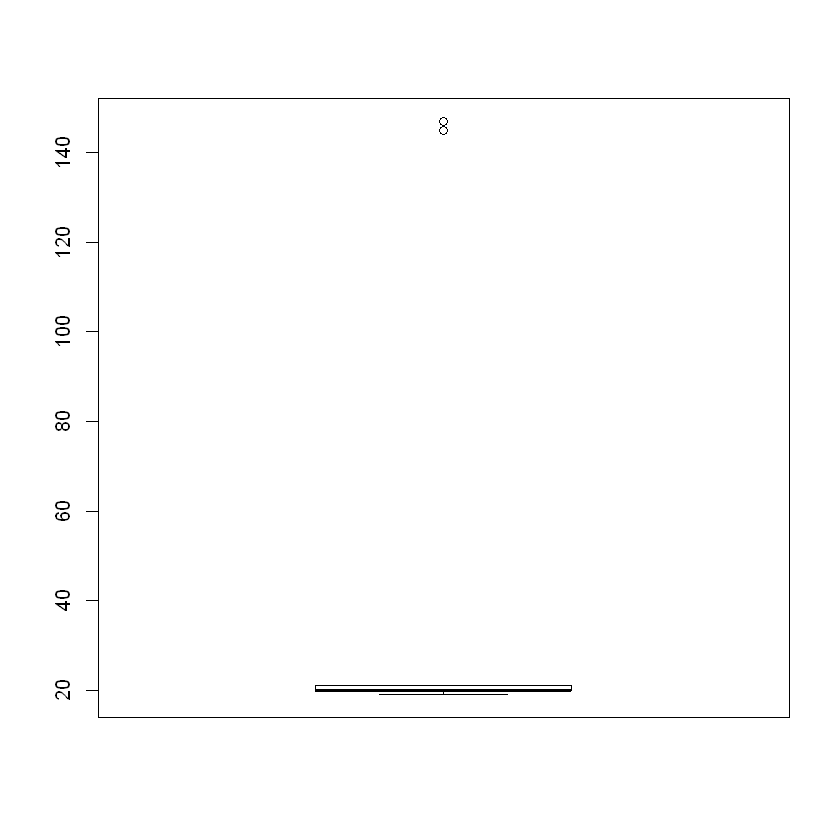

In [21]:
x<-boxplot(class1)
print(x$out)